# ML Project 1
Joseph Bentivegna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import invgamma

observations = 100
trials = 50

# Create binomial dataframe
samples = 10
probability = .7

bindf = pd.DataFrame((np.random.binomial(samples, probability, (trials, observations))), dtype=float)

# Create gaussian dataframe
mean = 2
sd = .5

gausdf = pd.DataFrame((np.random.normal(mean, sd, (trials, observations))), dtype=float)


In [2]:
# ML estimate for binomial

MLest = bindf.copy()

for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = (bindf.loc[i, j] /samples)
            MLest.loc[i, j] /= samples
        else:
            runSum += (bindf.loc[i, j] /samples)
            MLest.loc[i, j] = runSum/(j+1)

sqErr = (MLest - (probability)) ** (2)

meanSqErr = sqErr.sum() / trials

In [3]:
# Conjugate Prior estimate for binomial

a = [1, 5, 8]
b = [2, 6, 7]

Aest1 = bindf.copy()
Best1 = bindf.copy()
Aest2 = bindf.copy()
Best2 = bindf.copy()
Aest3 = bindf.copy()
Best3 = bindf.copy()

HP = 0
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = bindf.loc[i, j]
            runSamp = samples
            Aest1.loc[i, j] = a[HP] + runSum
            Best1.loc[i, j] = b[HP] + runSamp - runSum
        else:
            runSum += bindf.loc[i, j]
            runSamp += samples
            Aest1.loc[i, j] = a[HP] + runSum
            Best1.loc[i, j] = b[HP] + runSamp - runSum

HP = 1
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = bindf.loc[i, j]
            runSamp = samples
            Aest2.loc[i, j] = a[HP] + runSum
            Best2.loc[i, j] = b[HP] + runSamp - runSum
        else:
            runSum += bindf.loc[i, j]
            runSamp += samples
            Aest2.loc[i, j] = a[HP] + runSum
            Best2.loc[i, j] = b[HP] + runSamp - runSum

HP = 2
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = bindf.loc[i, j]
            runSamp = samples
            Aest3.loc[i, j] = a[HP] + runSum
            Best3.loc[i, j] = b[HP] + runSamp - runSum
        else:
            runSum += bindf.loc[i, j]
            runSamp += samples
            Aest3.loc[i, j] = a[HP] + runSum
            Best3.loc[i, j] = b[HP] + runSamp - runSum

AexpVal = (Aest1)/(Aest1 + Best1)
BexpVal = (Aest2)/(Aest2 + Best2)
CexpVal = (Aest3)/(Aest3 + Best3)

AsqErr = (AexpVal - (probability)) ** (2)
BsqErr = (BexpVal - (probability)) ** (2)
CsqErr = (CexpVal - (probability)) ** (2)

AmeanSqErr = AsqErr.sum() / trials
BmeanSqErr = BsqErr.sum() / trials
CmeanSqErr = CsqErr.sum() / trials

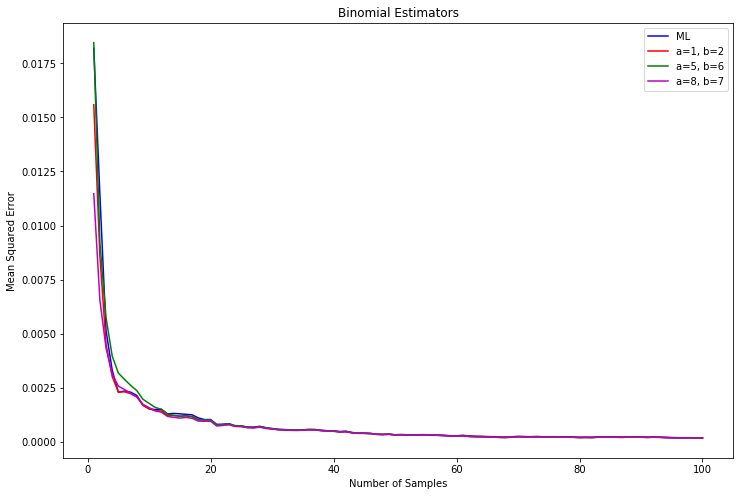

In [4]:
# Binomial Plots

fig = plt.figure(figsize=[12,8])
t = np.arange(1, observations+1, 1)
line1 = plt.plot(t, meanSqErr, 'b', label='ML')
line2 = plt.plot(t, AmeanSqErr, 'r', label='a=1, b=2')
line3 = plt.plot(t, BmeanSqErr, 'g', label='a=5, b=6')
line4 = plt.plot(t, CmeanSqErr, 'm', label='a=8, b=7')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')
plt.title('Binomial Estimators')
plt.legend()
plt.show()

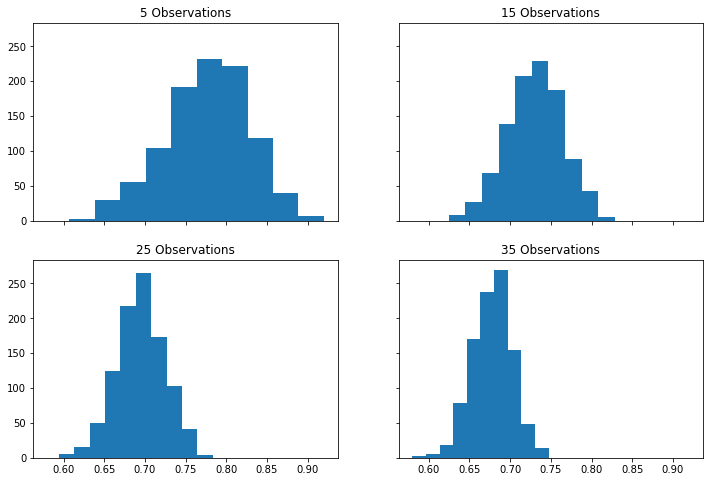

In [5]:
# Binomial posterior pdf plots

binSize = 10
beta1 = np.random.beta(Aest1.loc[0,5], Best1.loc[0,5], 1000)
beta2 = np.random.beta(Aest1.loc[0,15], Best1.loc[0,15], 1000)
beta3 = np.random.beta(Aest1.loc[0,25], Best1.loc[0,25], 1000)
beta4 = np.random.beta(Aest1.loc[0,35], Best1.loc[0,35], 1000)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,8))
ax1.hist(beta1, bins = binSize)
ax1.set_title('5 Observations')
ax2.hist(beta2, bins = binSize)
ax2.set_title('15 Observations')
ax3.hist(beta3, bins = binSize)
ax3.set_title('25 Observations')
ax4.hist(beta4, bins = binSize)
ax4.set_title('35 Observations')
plt.show()

In [6]:
# ML estimate for gaussian with known variance

MLGaus1 = gausdf.copy()

for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = gausdf.loc[i, j]
        else:
            runSum += gausdf.loc[i, j]
            MLGaus1.loc[i, j] = runSum/(j+1)

sqErrGaus1 = (MLGaus1 - mean) ** (2)

meanSqErrGaus1 = sqErrGaus1.sum() / trials

In [7]:
# Conjugate Estimator for gaussian with known variance

mu = [2, .5, 7]
sigSq = [1, 8, 3]

muGaus1 = gausdf.copy()
sigGaus1 = gausdf.copy()
muGaus2 = gausdf.copy()
sigGaus2 = gausdf.copy()
muGaus3 = gausdf.copy()
sigGaus3 = gausdf.copy()

HP = 0
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = gausdf.loc[i, j]
            muGaus1.loc[i, j] = (((mu[HP]/sigSq[HP]) + (runSum/sd**2))/ ((1/sigSq[HP])+(1/sd**2)))
            sigGaus1.loc[i, j] = ((1/sigSq[HP])+ (1/sd**2)) ** (-1)
        else:
            runSum += gausdf.loc[i, j]
            muGaus1.loc[i, j] = (((mu[HP]/sigSq[HP]) + (runSum/sd**2))/ ((1/sigSq[HP])+((j+1)/sd**2)))
            sigGaus1.loc[i, j] = ((1/sigSq[HP])+ ((j+1)/sd**2)) ** (-1)

HP = 1
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = gausdf.loc[i, j]
            muGaus2.loc[i, j] = (((mu[HP]/sigSq[HP]) + (runSum/sd**2))/ ((1/sigSq[HP])+(1/sd**2)))
            sigGaus2.loc[i, j] = ((1/sigSq[HP])+ (1/sd**2)) ** (-1)
        else:
            runSum += gausdf.loc[i, j]
            muGaus2.loc[i, j] = (((mu[HP]/sigSq[HP]) + (runSum/sd**2))/ ((1/sigSq[HP])+((j+1)/sd**2)))
            sigGaus2.loc[i, j] = ((1/sigSq[HP])+ ((j+1)/sd**2)) ** (-1)

HP = 2
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = gausdf.loc[i, j]
            muGaus3.loc[i, j] = (((mu[HP]/sigSq[HP]) + (runSum/sd**2))/ ((1/sigSq[HP])+(1/sd**2)))
            sigGaus3.loc[i, j] = ((1/sigSq[HP])+ (1/sd**2)) ** (-1)
        else:
            runSum += gausdf.loc[i, j]
            muGaus3.loc[i, j] = (((mu[HP]/sigSq[HP]) + (runSum/sd**2))/ ((1/sigSq[HP])+((j+1)/sd**2)))
            sigGaus3.loc[i, j] = ((1/sigSq[HP])+ ((j+1)/sd**2)) ** (-1)

gausSqErr1 = (muGaus1 - mean) ** (2)
gausSqErr2 = (muGaus2 - mean) ** (2)
gausSqErr3 = (muGaus3 - mean) ** (2)

gausMeanSqErr1 = gausSqErr1.sum() / trials
gausMeanSqErr2 = gausSqErr2.sum() / trials
gausMeanSqErr3 = gausSqErr3.sum() / trials


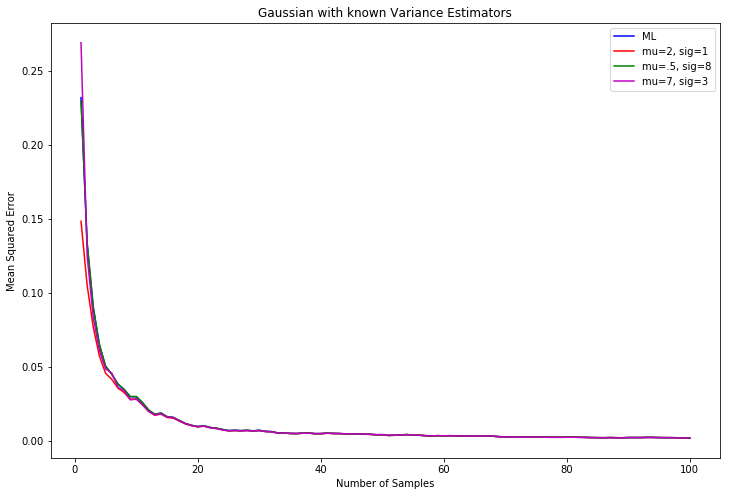

In [8]:
# Gaussian with known variance plots

fig = plt.figure(figsize=[12,8])
line1 = plt.plot(t, meanSqErrGaus1, 'b', label='ML')
line2 = plt.plot(t, gausMeanSqErr1, 'r', label='mu=2, sig=1')
line3 = plt.plot(t, gausMeanSqErr2, 'g', label='mu=.5, sig=8')
line4 = plt.plot(t, gausMeanSqErr3, 'm', label='mu=7, sig=3')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')
plt.title('Gaussian with known Variance Estimators')
plt.legend()
plt.show()

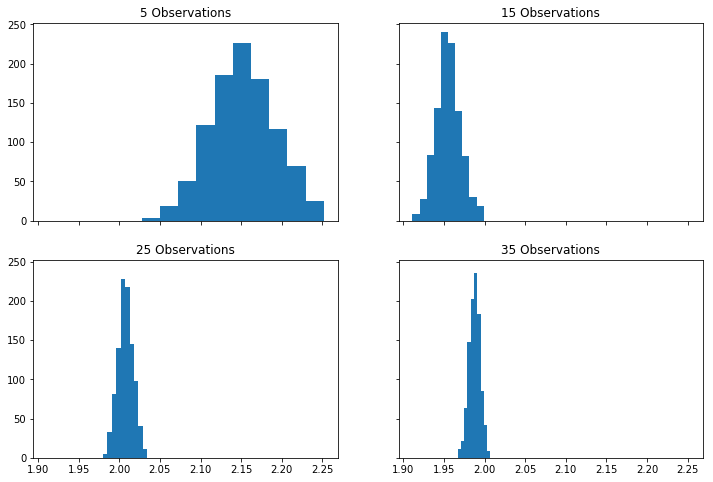

In [9]:
# Gaussian with known Variance posterior pdf plots

binSize = 10
norm1 = np.random.normal(muGaus1.loc[0,5], sigGaus1.loc[0,5], 1000)
norm2 = np.random.normal(muGaus1.loc[0,15], sigGaus1.loc[0,15], 1000)
norm3 = np.random.normal(muGaus1.loc[0,25], sigGaus1.loc[0,25], 1000)
norm4 = np.random.normal(muGaus1.loc[0,35], sigGaus1.loc[0,35], 1000)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,8))
ax1.hist(norm1, bins = binSize)
ax1.set_title('5 Observations')
ax2.hist(norm2, bins = binSize)
ax2.set_title('15 Observations')
ax3.hist(norm3, bins = binSize)
ax3.set_title('25 Observations')
ax4.hist(norm4, bins = binSize)
ax4.set_title('35 Observations')
plt.show()

In [10]:
# ML estimate for gaussian with known mean

MLGaus2 = gausdf.copy()

for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runErr = ((gausdf.loc[i, j] - mean)  ** (2))
            MLGaus2.loc[i, j] = runErr
        else:
            runErr += ((gausdf.loc[i, j] - mean) ** (2))
            MLGaus2.loc[i, j] = runErr/(j+1)

sqErrGaus2 = (MLGaus2 - sd**2) ** (2)

meanSqErrGaus2 = sqErrGaus2.sum() / trials

In [11]:
# Conjugate Estimator for gaussian with known mean

A = [6, 7, 13]
B = [4, .5, 8]

AGaus1 = gausdf.copy()
BGaus1 = gausdf.copy()
AGaus2 = gausdf.copy()
BGaus2 = gausdf.copy()
AGaus3 = gausdf.copy()
BGaus3 = gausdf.copy()

HP = 0
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = ((gausdf.loc[i, j] - mean) ** (2))
            AGaus1.loc[i, j] = A[HP] + 1/2
            BGaus1.loc[i, j] = B[HP] + (runSum/2)
        else:
            runSum += ((gausdf.loc[i, j] - mean) ** (2))
            AGaus1.loc[i, j] = A[HP] + ((j+1)/2)
            BGaus1.loc[i, j] = B[HP] + (runSum/2)

HP = 1
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = ((gausdf.loc[i, j] - mean) ** (2))
            AGaus2.loc[i, j] = A[HP] + 1/2
            BGaus2.loc[i, j] = B[HP] + (runSum/2)
        else:
            runSum += ((gausdf.loc[i, j] - mean) ** (2))
            AGaus2.loc[i, j] = A[HP] + ((j+1)/2)
            BGaus2.loc[i, j] = B[HP] + (runSum/2)

HP = 2
for i in range(0, trials):
    for j in range(0, observations):
        if (j == 0):
            runSum = ((gausdf.loc[i, j] - mean) ** (2))
            AGaus3.loc[i, j] = A[HP] + 1/2
            BGaus3.loc[i, j] = B[HP] + (runSum/2)
        else:
            runSum += ((gausdf.loc[i, j] - mean) ** (2))
            AGaus3.loc[i, j] = A[HP] + ((j+1)/2)
            BGaus3.loc[i, j] = B[HP] + (runSum/2)

gausExpVal1 = (BGaus1)/(AGaus1.subtract(1))
gausExpVal2 = (BGaus2)/(AGaus2.subtract(1))
gausExpVal3 = (BGaus3)/(AGaus3.subtract(1))

gaus2SqErr1 = (gausExpVal1 - sd**2) ** (2)
gaus2SqErr2 = (gausExpVal2 - sd**2) ** (2)
gaus2SqErr3 = (gausExpVal3 - sd**2) ** (2)

gaus2MeanSqErr1 = gaus2SqErr1.sum() / trials
gaus2MeanSqErr2 = gaus2SqErr2.sum() / trials
gaus2MeanSqErr3 = gaus2SqErr3.sum() / trials

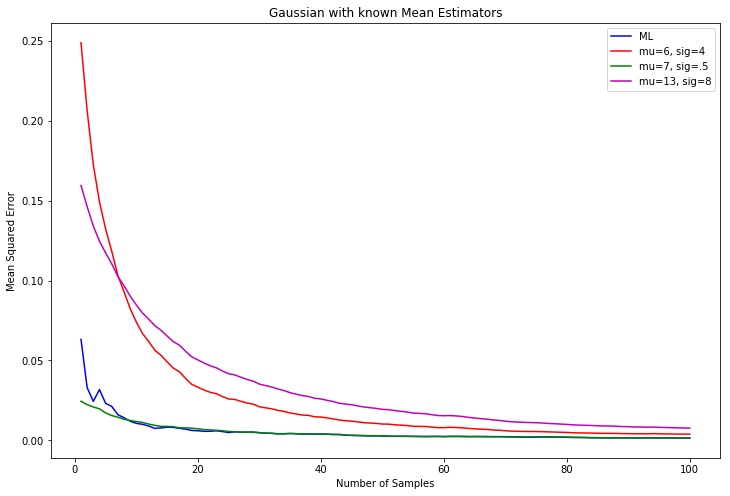

In [12]:
# Gaussian with known Mean Plots

fig = plt.figure(figsize=[12,8])
line1 = plt.plot(t, meanSqErrGaus2, 'b', label='ML')
line2 = plt.plot(t, gaus2MeanSqErr1, 'r', label='mu=6, sig=4')
line3 = plt.plot(t, gaus2MeanSqErr2, 'g', label='mu=7, sig=.5')
line4 = plt.plot(t, gaus2MeanSqErr3, 'm', label='mu=13, sig=8')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')
plt.title('Gaussian with known Mean Estimators')
plt.legend()
plt.show()

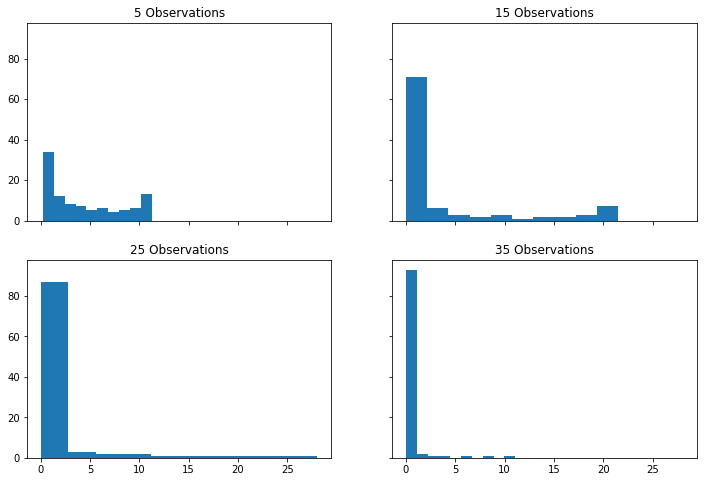

In [13]:
# Gaussian with known mean posterior pdf plots

binSize = 10
a = AGaus1.loc[0, 5]
b = AGaus1.loc[0, 15]
c = AGaus1.loc[0, 25]
d = AGaus1.loc[0, 35]
x = x = np.linspace(invgamma.ppf(0.01, a), invgamma.ppf(0.99, a), 100)
invGam1 = invgamma.pdf(x, a)
invGam2 = invgamma.pdf(x, b)
invGam3 = invgamma.pdf(x, c)
invGam4 = invgamma.pdf(x, d)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,8))
ax1.hist(invGam1)
ax1.set_title('5 Observations')
ax2.hist(invGam2)
ax2.set_title('15 Observations')
ax3.hist(invGam3)
ax3.set_title('25 Observations')
ax4.hist(invGam4)
ax4.set_title('35 Observations')
plt.show()